The modern age of the NBA still continues to use 5 positions to define each player on a team. These 5 roles include the Point Guard, Shooting Guard, Small Forward, Power Forward, and Center. While these positions still give a good overview as to the responsibilities of players, I believe we can take a deeper look to find out how players across different positions may have the same playstyle or role. In the modern NBA, the position may not truly define the capabilities and talents of a player, so lets take a deeper dive using Machine Learning

In this report, I will be using the K-means clustering algorithm to find and identify similarities in NBA playstyles. K-means clusting is a machine learning algorithm that tries to discover patterns or structure within data. Unlike other machine learning algorithms, this is achieved through unsupervised learning, where the algorithm discovers structure in the data by itself.

Given how many statistics we can find on NBA players, we can try finding similar patterns between players using match box scores.For example, we can try to identify players who may lean more towards scoring in the paint and rebounding by finding a trend in players who dominate in scoring and rebounding. Another example is identifying patterns in three-point percentage and defensive statistics. Players who tend to dominate in these categories can be classified as a "3 and D" Player. These two patterns, along with a few others will be identified throughout this report.

1. Importing Libraries and Loading Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [208]:
df = pd.read_excel(r'D:\CodingProjects\nbaanalysis\data\database_24_25.xlsx')
df.head()

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22


2. Setting up player data by means. Each statistic defined here will be used as a feature within our K-Means clustering algorithm.

In [223]:
df_player = df.groupby("Player").agg({
    "MP": "sum",    # total minutes
    "PTS": "mean",
    "AST": "mean",
    "TRB": "mean",
    "STL": "mean",
    "BLK": "mean",
    "TOV": "mean",
    "FG%": "mean",
    "3P%": "mean",
    "FT%": "mean",
    "GmSc": "mean"
}).reset_index()
df_player = df_player[df_player["MP"] >= 200]
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%", "GmSc"]
df_features = df_player[["Player"] + features]

df_features = df_features.fillna(0)
df_features.head()

,Player,PTS,AST,TRB,STL,BLK,TOV,FG%,3P%,FT%,GmSc
2,Aaron Gordon,15.428571,3.142857,6.714286,0.714286,0.285714,1.285714,0.515857,0.494857,0.614286,14.50
5,Aaron Wiggins,10.200000,2.000000,4.000000,1.000000,0.300000,0.700000,0.497400,0.435000,0.300000,8.92
10,Al Horford,8.700000,2.400000,5.700000,1.100000,0.700000,1.000000,0.451100,0.422400,0.200000,9.22
17,Alperen Sengun,16.900000,3.900000,11.000000,1.000000,1.100000,2.000000,0.442300,0.216700,0.649200,15.00
18,Amen Thompson,10.000000,2.100000,5.900000,0.700000,0.400000,1.600000,0.513000,0.150000,0.750000,8.54


In [210]:
X = df_features.drop(columns=["Player"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Run K-means clustering algorithm, first testing with 5 different clusters, then creating a new column in the data to mark which cluster the player falls in.

In [211]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_features["Cluster"] = kmeans.fit_predict(X_scaled)

Next, we generate means for each cluster, that way we can identify the stats each category of player averaged.

In [212]:
cluster_summary = df_features.groupby("Cluster").mean(numeric_only=True)
print(cluster_summary)

               PTS       AST       TRB       STL       BLK       TOV  \
Cluster                                                                
0        19.193477  4.184804  4.731322  1.075226  0.413713  2.095602   
1        12.437903  2.025728  8.750433  0.887656  1.441420  1.746182   
2        25.757031  6.575266  8.052738  1.102858  0.690883  3.452392   
3        10.973348  2.492485  4.321318  0.742540  0.428692  1.378283   
4         9.799573  2.361409  3.732615  1.089459  0.450550  0.956423   

              FG%       3P%       FT%       GmSc  
Cluster                                           
0        0.477138  0.378931  0.722396  14.661440  
1        0.538014  0.135640  0.525379  11.612163  
2        0.490555  0.336421  0.776659  20.628833  
3        0.393494  0.257113  0.542330   7.939528  
4        0.472879  0.398867  0.345350   8.445857  


In [213]:
df_features.groupby("Cluster").apply(lambda g: g.head(10))

C:\Users\nikhi\AppData\Local\Temp\ipykernel_27768\1181774900.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_features.groupby("Cluster").apply(lambda g: g.head(10))


Player        PTS       AST        TRB       STL  \
Cluster                                                                        
0       2             Aaron Gordon  15.428571  3.142857   6.714286  0.714286   
        24         Anfernee Simons  17.545455  4.636364   2.090909  0.818182   
        31           Austin Reaves  18.700000  5.200000   4.500000  1.400000   
        37      Bennedict Mathurin  19.400000  1.900000   6.100000  0.500000   
        38         Bilal Coulibaly  17.000000  3.000000   5.500000  1.125000   
        43            Bradley Beal  17.000000  3.625000   4.125000  1.375000   
        47          Brandon Ingram  22.800000  4.600000   6.000000  0.800000   
        54             Buddy Hield  18.000000  2.100000   4.300000  0.800000   
        60              Cam Thomas  25.200000  3.200000   3.000000  0.900000   
        62         Cameron Johnson  17.400000  2.900000   4.400000  0.600000   
1       17          Alperen Sengun  16.900000  3.900000  11.000000  1.000000   
        20          Andre Drummond   9.666667  0.444444  10.666667  1.555556   
        33             Bam Adebayo  14.777778  4.000000   8.777778  1.888889   
        52             Brook Lopez   9.000000  1.600000   4.600000  1.000000   
        68           Chet Holmgren  16.400000  2.000000   8.700000  0.800000   
        74            Clint Capela  10.545455  1.090909   7.181818  0.363636   
        93          Daniel Gafford  11.900000  1.200000   6.100000  0.500000   
        108          Deandre Ayton  13.272727  1.000000  10.545455  0.909091   
        138            Evan Mobley  18.363636  2.727273   8.545455  1.090909   
        166         Isaiah Stewart   5.545455  2.272727   7.272727  0.545455   
2       26           Anthony Davis  31.222222  2.777778  10.444444  1.333333   
        27         Anthony Edwards  28.300000  3.800000   5.800000  0.900000   
        56         Cade Cunningham  23.090909  8.272727   7.272727  0.545455   
        91          Damian Lillard  26.000000  6.600000   4.600000  1.000000   
        102           De'Aaron Fox  24.200000  4.900000   5.200000  1.700000   
        121       Domantas Sabonis  20.500000  6.900000  12.900000  0.600000   
        148  Giannis Antetokounmpo  31.555556  5.222222  12.777778  0.444444   
        169              Ja Morant  20.625000  9.125000   5.000000  0.625000   
        187          Jalen Johnson  19.090909  4.909091  10.000000  1.363636   
        196           James Harden  21.200000  9.000000   8.100000  1.700000   
3       18           Amen Thompson  10.000000  2.100000   5.900000  0.700000   
        23          Andrew Wiggins  15.500000  2.250000   4.750000  0.750000   
        25           Anthony Black   8.090909  4.090909   2.727273  0.636364   
        32             Ayo Dosunmu  10.800000  4.000000   4.800000  0.100000   
        40            Bobby Portis  12.500000  0.800000   8.200000  0.500000   
        44      Brandin Podziemski   8.777778  3.666667   5.000000  1.000000   
        58            Caleb Martin  10.333333  3.000000   6.000000  0.888889   
        65      Carlton Carrington   9.500000  5.000000   4.750000  1.125000   
        69           Chris Boucher  11.545455  0.818182   4.272727  0.545455   
        77           Cody Williams   4.222222  1.333333   2.777778  0.555556   
4       5            Aaron Wiggins  10.200000  2.000000   4.000000  1.000000   
        10              Al Horford   8.700000  2.400000   5.700000  1.100000   
        19             Amir Coffey   9.100000  0.600000   2.100000  0.600000   
        64            Caris LeVert  12.000000  4.666667   2.888889  1.222222   
        66           Cason Wallace   7.500000  1.300000   3.300000  1.400000   
        76             Cody Martin   9.900000  2.100000   4.500000  0.900000   
        107              Dean Wade   6.000000  1.777778   4.555556  1.111111   
        114          Derrick Jones  10.300000  1.000000   3.400000  1.100000   
        126    Dorian Finney

Considering how many variables/features go along with each player, we use t-SNE or (t-Distributed Stochastic Embedding) which is a dimensionality reduction technique, to help visualize our data in 2D. t-SNE helps us compress information into 2D so we are able to visualize it.

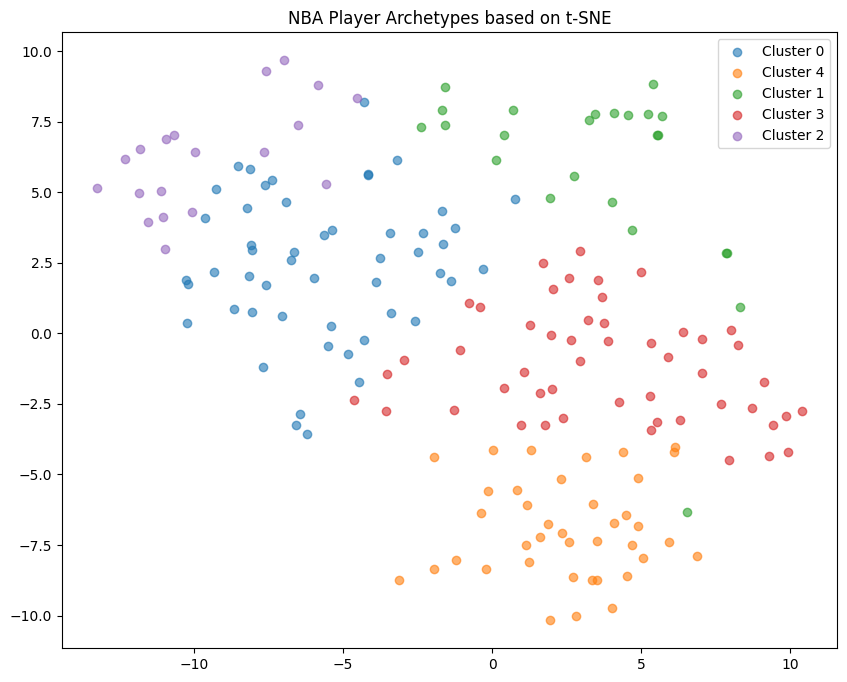

In [214]:

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df_features["TSNE1"] = X_tsne[:, 0]
df_features["TSNE2"] = X_tsne[:, 1]


plt.figure(figsize=(10, 8))
for cluster in df_features['Cluster'].unique():
    subset = df_features[df_features['Cluster'] == cluster]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Cluster {cluster}', alpha=0.6)
    
plt.legend()
plt.title('NBA Player Archetypes based on t-SNE')
plt.show()

In [215]:
cluster_summary = df_features.groupby("Cluster").mean(numeric_only=True)
print(cluster_summary)

               PTS       AST       TRB       STL       BLK       TOV  \
Cluster                                                                
0        19.193477  4.184804  4.731322  1.075226  0.413713  2.095602   
1        12.437903  2.025728  8.750433  0.887656  1.441420  1.746182   
2        25.757031  6.575266  8.052738  1.102858  0.690883  3.452392   
3        10.973348  2.492485  4.321318  0.742540  0.428692  1.378283   
4         9.799573  2.361409  3.732615  1.089459  0.450550  0.956423   

              FG%       3P%       FT%       GmSc     TSNE1     TSNE2  
Cluster                                                               
0        0.477138  0.378931  0.722396  14.661440 -5.646833  2.421149  
1        0.538014  0.135640  0.525379  11.612163  3.361054  5.861836  
2        0.490555  0.336421  0.776659  20.628833 -9.480807  6.255120  
3        0.393494  0.257113  0.542330   7.939528  3.800334 -1.158517  
4        0.472879  0.398867  0.345350   8.445857  2.509277 -6.912754 

In [216]:
df_features[["Player", "Cluster"]].to_csv("D:/CodingProjects/nbaanalysis/data/player_clusters.csv", index=False)


In [217]:
for c in df_features['Cluster'].unique():
    print(f"\nCluster {c} top players:")
    print(df_features[df_features["Cluster"] == c][["Player", "PTS", "AST", "TRB", "BLK", "STL", "3P%"]].head(10))


Cluster 0 top players:
                Player        PTS       AST       TRB       BLK       STL  \
2         Aaron Gordon  15.428571  3.142857  6.714286  0.285714  0.714286   
24     Anfernee Simons  17.545455  4.636364  2.090909  0.090909  0.818182   
31       Austin Reaves  18.700000  5.200000  4.500000  0.400000  1.400000   
37  Bennedict Mathurin  19.400000  1.900000  6.100000  0.100000  0.500000   
38     Bilal Coulibaly  17.000000  3.000000  5.500000  0.750000  1.125000   
43        Bradley Beal  17.000000  3.625000  4.125000  0.875000  1.375000   
47      Brandon Ingram  22.800000  4.600000  6.000000  0.600000  0.800000   
54         Buddy Hield  18.000000  2.100000  4.300000  0.500000  0.800000   
60          Cam Thomas  25.200000  3.200000  3.000000  0.000000  0.900000   
62     Cameron Johnson  17.400000  2.900000  4.400000  0.400000  0.600000   

         3P%  
2   0.494857  
24  0.283545  
31  0.347500  
37  0.532800  
38  0.353375  
43  0.372250  
47  0.337700  
54  0.47

In [218]:
archetype_map = {
    0: "Bucket Getters",
    1: "Big Men Defenders",
    2: "All Stars (All-Around Players)",
    3: "Rotational Role Players",
    4: "3 And D Specialists"
    
}
df_features["Player Type"] = df_features["Cluster"].map(archetype_map)

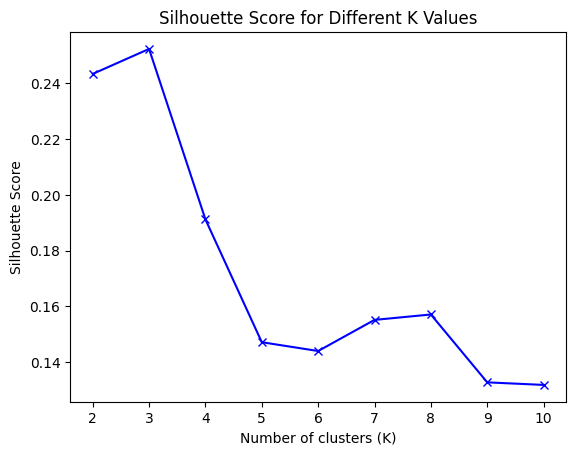

In [219]:
scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

plt.plot(K, scores, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.show()
    
    

In [220]:
for k in [3,5,6]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    df_features[f"Cluster_{k}"] = labels
    print(f"\n=== {k} Clusters ===")
    print(df_features.groupby(f"Cluster_{k}").mean(numeric_only=True)[["PTS","AST","TRB","STL","BLK", "3P%"]])



=== 3 Clusters ===
                 PTS       AST       TRB       STL       BLK       3P%
Cluster_3                                                             
0          14.329832  2.286473  9.146647  0.852218  1.462727  0.123540
1          20.907074  5.060306  5.515482  1.099032  0.456051  0.368668
2          10.728880  2.367117  4.193583  0.903869  0.468712  0.322376

=== 5 Clusters ===
                 PTS       AST       TRB       STL       BLK       3P%
Cluster_5                                                             
0          19.193477  4.184804  4.731322  1.075226  0.413713  0.378931
1          12.437903  2.025728  8.750433  0.887656  1.441420  0.135640
2          25.757031  6.575266  8.052738  1.102858  0.690883  0.336421
3          10.973348  2.492485  4.321318  0.742540  0.428692  0.257113
4           9.799573  2.361409  3.732615  1.089459  0.450550  0.398867

=== 6 Clusters ===
                 PTS       AST       TRB       STL       BLK       3P%
Cluster_6        

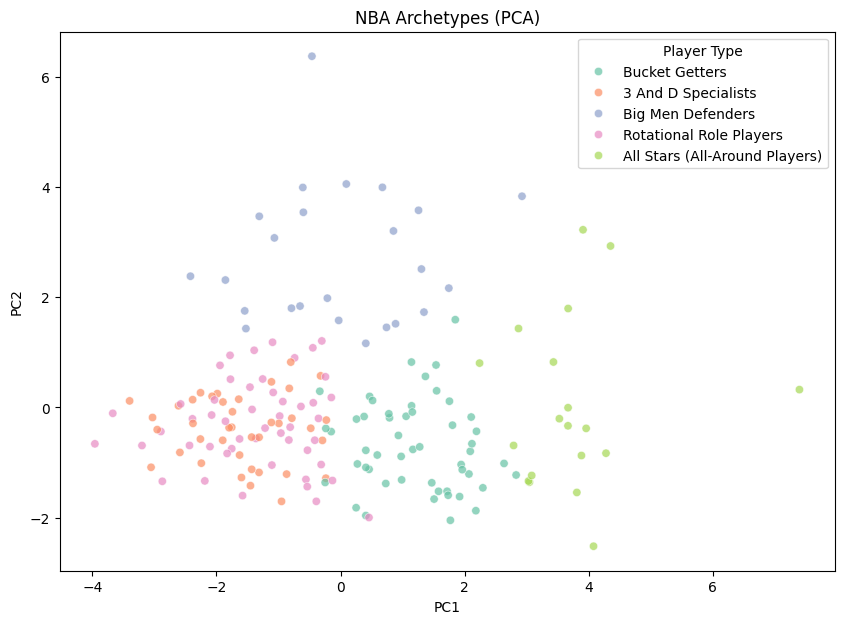

In [221]:
import seaborn as sns

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
df_features["PC1"] = X_pca[:, 0]
df_features["PC2"] = X_pca[:, 1]

plt.figure(figsize=(10,7))
sns.scatterplot(data=df_features, x="PC1", y="PC2", hue="Player Type", palette="Set2", alpha=0.7)
plt.title("NBA Archetypes (PCA)")
plt.show()


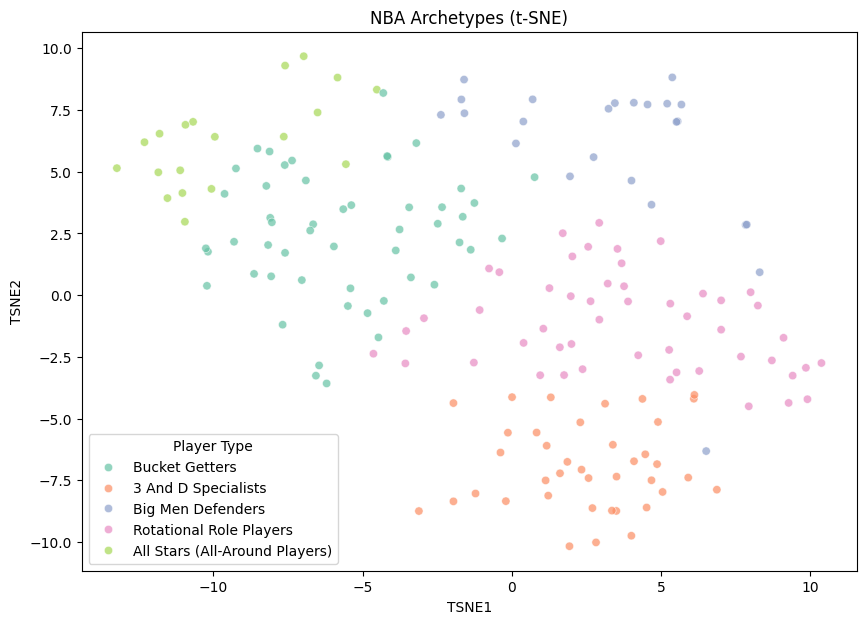

In [222]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df_features["TSNE1"] = X_tsne[:, 0]
df_features["TSNE2"] = X_tsne[:, 1]

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_features,
    x="TSNE1", y="TSNE2",
    hue="Player Type",
    palette="Set2", alpha=0.7
)
plt.title("NBA Archetypes (t-SNE)")
plt.show()
